# **Import Libraries and modules**

installing and Importing Keras for current solution

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing Numpy and Keras modules as well as mnist data set.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Loading mnist data set in train and test variables.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


Ploting sample from train data set.

(60000, 28, 28)


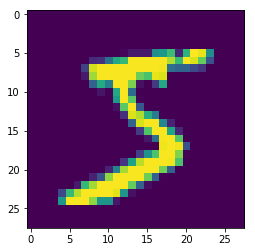

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping all train and test data to a uniform size.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Regularizing train and test data for float data type and division wiht 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Visualizing train out put

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Viewing tranformed train out put matrix

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Defining CNN with drop outs; not using max pooling as it may not be very useful for these size of images. 

In [20]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.3))
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(Dropout(0.3))
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(Dropout(0.3))
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 22,22 #RF 9X9
model.add(Dropout(0.3))
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 20,20 #RF 11X11
model.add(Dropout(0.3))
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 18,18 #RF 13X13
model.add(Dropout(0.3))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 16,16 #RF 15X15
model.add(Dropout(0.3))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 14,14 #RF 17X17
model.add(Dropout(0.3))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 12,12 #RF 19X19
model.add(Dropout(0.3))

model.add(Convolution2D(10, 1)) #input 10,10 , activation='relu'
model.add(Convolution2D(10, 10)) #input 10,10

'''

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(MaxPooling2D(pool_size=(2, 2))) #input 22,22 #RF 14X14
model.add(Convolution2D(32, 3, 3, activation='relu')) #input 11,11 #RF 16X16
model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 9)) #input 9X9
'''
'''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(MaxPooling2D(pool_size=(2, 2))) #input 24,24 #RF 6X6
model.add(Convolution2D(32, 3, 3, activation='relu')) #input 12,12 #RF 8X8
#model.add(Convolution2D(32, 3, 3, activation='relu')) #input 11,11 #RF 10X10
model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 10)) #input 9X9
'''

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-package

Printing model summary to understand current paramaters for the model. 

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
dropout_10 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 8)         584       
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 8)         584       
_________________________________________________________________
dropout_12 (Dropout)         (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 8)         584       
__________

Setting model's compile environment with loss function, optimizer and matrics.

In [0]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=1.0, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Training model for 100 epoch for 128 batch size

In [23]:
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=100, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.7609 - acc: 0.7472 - val_loss: 0.3027 - val_acc: 0.9066
Epoch 2/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.3183 - acc: 0.9009 - val_loss: 0.1877 - val_acc: 0.9364
Epoch 3/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.2061 - acc: 0.9351 - val_loss: 0.1032 - val_acc: 0.9671
Epoch 4/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.1610 - acc: 0.9509 - val_loss: 0.1083 - val_acc: 0.9664
Epoch 5/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1363 - acc: 0.9582 - val_loss: 0.0838 - val_acc: 0.9740
Epoch 6/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1215 - acc: 0.9618 - val_loss: 0.0698 - val_acc: 0.9779
Epoch 7/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1112 - acc: 0.9655 - val_loss: 0.0740 - 

Training model for another 256 batch size for 10 epochs.

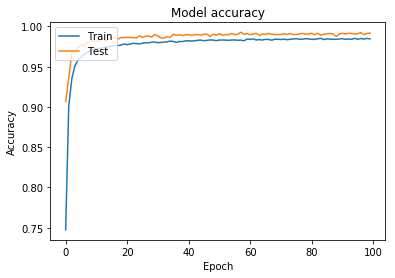

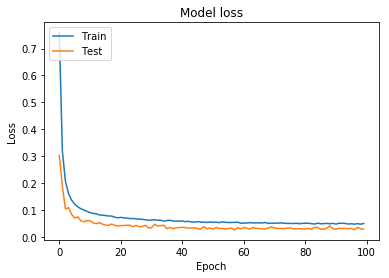

In [24]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0442 - acc: 0.9860 - val_loss: 0.0276 - val_acc: 0.9919
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0435 - acc: 0.9864 - val_loss: 0.0266 - val_acc: 0.9918
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0447 - acc: 0.9856 - val_loss: 0.0291 - val_acc: 0.9917
Epoch 4/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.0416 - acc: 0.9869 - val_loss: 0.0262 - val_acc: 0.9921
Epoch 5/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.0292 - val_acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.0421 - acc: 0.9871 - val_loss: 0.0291 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0425 - acc: 0.9863 - val_loss: 0.0296 - val_acc

Training model for another 10 epochs with batch of 256 as last vla_acc is .9910

In [26]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1792/60000 [..............................] - ETA: 5s - loss: 0.0268 - acc: 0.9911

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 4s 61us/step - loss: 0.0428 - acc: 0.9863 - val_loss: 0.0277 - val_acc: 0.9917
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0423 - acc: 0.9863 - val_loss: 0.0268 - val_acc: 0.9919
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0430 - acc: 0.9860 - val_loss: 0.0276 - val_acc: 0.9924
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0419 - acc: 0.9864 - val_loss: 0.0280 - val_acc: 0.9907
Epoch 5/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.0429 - acc: 0.9863 - val_loss: 0.0305 - val_acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0433 - acc: 0.9863 - val_loss: 0.0337 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0423 - acc: 0.9864 - val_loss: 0.0278 - val_acc: 0.9921
Epoch 8/10
60000/60000 [============================

Training model for another 10 epochs with increased batch size of 512; expecting improvement in val acce for .9925

In [27]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0395 - acc: 0.9874 - val_loss: 0.0248 - val_acc: 0.9925
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0385 - acc: 0.9877 - val_loss: 0.0270 - val_acc: 0.9923
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0396 - acc: 0.9876 - val_loss: 0.0304 - val_acc: 0.9910
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0381 - acc: 0.9877 - val_loss: 0.0267 - val_acc: 0.9920
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0371 - acc: 0.9878 - val_loss: 0.0264 - val_acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0387 - acc: 0.9881 - val_loss: 0.0263 - val_acc: 0.9926
Epoch 7/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0382 - acc: 0.9882 - val_loss: 0.0285 - val_acc

Val_acc still .9922; training for another 10 epochs 

In [28]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 2560/60000 [>.............................] - ETA: 4s - loss: 0.0410 - acc: 0.9855

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 54us/step - loss: 0.0383 - acc: 0.9880 - val_loss: 0.0284 - val_acc: 0.9914
Epoch 2/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0387 - acc: 0.9870 - val_loss: 0.0284 - val_acc: 0.9916
Epoch 3/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0382 - acc: 0.9876 - val_loss: 0.0268 - val_acc: 0.9918
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0394 - acc: 0.9874 - val_loss: 0.0287 - val_acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0384 - acc: 0.9874 - val_loss: 0.0267 - val_acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0372 - acc: 0.9880 - val_loss: 0.0261 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0402 - acc: 0.9873 - val_loss: 0.0272 - val_acc: 0.9914
Epoch 8/10
60000/60000 [============================

Training for 10 epochs to increase acc from .9914

In [29]:
model.fit(X_train, Y_train, batch_size=1024, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 2048/60000 [>.............................] - ETA: 3s - loss: 0.0295 - acc: 0.9902

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 49us/step - loss: 0.0375 - acc: 0.9884 - val_loss: 0.0268 - val_acc: 0.9919
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0352 - acc: 0.9887 - val_loss: 0.0268 - val_acc: 0.9920
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0354 - acc: 0.9890 - val_loss: 0.0256 - val_acc: 0.9919
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0353 - acc: 0.9887 - val_loss: 0.0264 - val_acc: 0.9917
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0358 - acc: 0.9884 - val_loss: 0.0279 - val_acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0347 - acc: 0.9892 - val_loss: 0.0260 - val_acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0366 - acc: 0.9881 - val_loss: 0.0257 - val_acc: 0.9918
Epoch 8/10
60000/60000 [============================

Training with increasd batch size of 2048 to try and increase accuracy of model

In [30]:
model.fit(X_train, Y_train, batch_size=2048, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 2048/60000 [>.............................] - ETA: 3s - loss: 0.0478 - acc: 0.9824

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 47us/step - loss: 0.0349 - acc: 0.9885 - val_loss: 0.0263 - val_acc: 0.9924
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0341 - acc: 0.9889 - val_loss: 0.0283 - val_acc: 0.9914
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0339 - acc: 0.9893 - val_loss: 0.0266 - val_acc: 0.9919
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0336 - acc: 0.9895 - val_loss: 0.0254 - val_acc: 0.9923
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0328 - acc: 0.9894 - val_loss: 0.0271 - val_acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0329 - acc: 0.9895 - val_loss: 0.0261 - val_acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0340 - acc: 0.9887 - val_loss: 0.0259 - val_acc: 0.9922
Epoch 8/10
60000/60000 [============================

Evaluating model and storing score in a variable.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing loss and accuracy of model test done in last step

In [32]:
print(score)

[0.025956442816008347, 0.9923]


Predicting out put for test inputs

In [0]:
y_pred = model.predict(X_test)

Printing prediction and test out puts 

In [126]:
print(y_pred[:9])
print(y_test[:9])

[[8.83453048e-17 2.23902832e-22 5.03254502e-13 1.60512364e-13
  4.02065522e-23 9.60435273e-19 0.00000000e+00 1.00000000e+00
  1.39047658e-16 1.85744840e-11]
 [3.93890887e-21 7.82338257e-12 1.00000000e+00 3.59788031e-17
  1.38093388e-18 1.37124121e-29 4.85452095e-11 2.52794327e-23
  1.14365700e-16 1.80574017e-27]
 [4.05707407e-17 1.00000000e+00 2.24106909e-12 8.25022068e-17
  6.03128159e-10 3.44477593e-14 1.42322758e-13 1.16682185e-11
  3.78736241e-13 1.01929050e-17]
 [1.00000000e+00 5.48987821e-33 1.91183327e-17 4.73503497e-22
  6.40486258e-19 6.92827582e-24 3.11879712e-15 4.00338433e-19
  3.24701504e-19 7.47422979e-19]
 [8.47725630e-29 1.00496457e-21 2.52994851e-24 3.29754186e-28
  1.00000000e+00 2.08647185e-28 4.26313701e-21 5.24219354e-19
  6.29316102e-20 1.76778762e-15]
 [2.48050972e-12 1.00000000e+00 9.11990483e-10 4.10908282e-16
  9.71266290e-10 5.04951478e-17 5.48377736e-14 4.93403363e-08
  8.02247435e-11 1.75318283e-13]
 [9.30098297e-33 9.37158608e-15 2.06010754e-17 7.46690805e

In [127]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_21': <keras.layers.core.Activation at 0x7f58f2cb80f0>,
 'conv2d_173': <keras.layers.convolutional.Conv2D at 0x7f58f2d7d748>,
 'conv2d_174': <keras.layers.convolutional.Conv2D at 0x7f58f2d7d550>,
 'conv2d_175': <keras.layers.convolutional.Conv2D at 0x7f58f2d27160>,
 'conv2d_176': <keras.layers.convolutional.Conv2D at 0x7f58f2d270f0>,
 'conv2d_177': <keras.layers.convolutional.Conv2D at 0x7f58f2cc8ba8>,
 'conv2d_178': <keras.layers.convolutional.Conv2D at 0x7f58f2cf15c0>,
 'flatten_21': <keras.layers.core.Flatten at 0x7f58f2c8bfd0>,
 'max_pooling2d_13': <keras.layers.pooling.MaxPooling2D at 0x7f58f2cdde10>}

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_156'):  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()